# **Exploratory Data Analysis on Accidents in United States of America**
This is an Exploratory Data Analysis(EDA) project on a dataset which contains United States accidents data from across the country. The dataset contains the data from February 2016 to December 2020. The data has about 1.5 million records and is about 569 MB as of 29th November 2021.

This analysis can be used for numerous applications such as:
> - Real-time accident prediction.
> - Predicting accident hotspot locations
> - Extracting Causes 
> - Casualty Analysis
> - Study the impact of precipitation and other environmental stimuli on accident occurence 

## **Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading/Downloading the data**
Load the US accidents dataset using pandas and store it as df

In [2]:
pip install opendatasets --upgrade --quiet


In [3]:
import opendatasets as od
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)
# b22b9b38a5f597595f622bf5a73ce6ac

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prajwal31shinde
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:01<00:00, 67.4MB/s]


In [4]:
datafile = './us-accidents/US_Accidents_Dec20_updated.csv'

In [5]:
df = pd.read_csv(datafile)

## **Preparing and Cleaning the Data**
> - Look at the information given in the file
> - Find the missing value in the data if any

In [6]:
#brief look of the data
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [7]:
df.shape


(1516064, 47)

Data has 1516064 (around 1.5 million) records and 47 columns.

In [8]:
#get all the columns of the data
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
#Extract the information about the datasets and check for any discrepencies in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

Info function returns the information about all the colums in the dataset as a panda data frame. It return the column name, no of non-null entries, and datatype.

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [11]:
df.isna()
# Returns a boolean True when value is null at any position

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1516060,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1516061,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1516062,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isna().sum()
# Gives an idea of the no of null values in the columns

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [13]:
missing_data = df.isna().sum(axis=0).sort_values()
missing_data = missing_data.to_frame()
missing_data.columns = ['missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]
missing_data

# Get the sum of null values from each column and sort it in ascending value
# Convert those sum values into a dataframe 
# Create a column and print those values which are greater than zero using loc function

,missing_count
Sunrise_Sunset,83
Civil_Twilight,83
Astronomical_Twilight,83
Nautical_Twilight,83
City,83
Zipcode,935
Timezone,2302
Airport_Code,4248
Weather_Timestamp,30264
Pressure(in),36274


## **Analyze The Data**

### **City**

In [14]:
cities = df['City'].unique()
cities

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Succasunna', 'Valleyford',
       'American Fork-Pleasant Grove'], dtype=object)

In [15]:
len(cities)

10658

There are 10658 unique cities all over the country for which the accidents has been recorded

In [16]:
accident_by_cities = df['City'].value_counts()
accident_by_cities

Los Angeles        39984
Miami              36233
Charlotte          22203
Houston            20843
Dallas             19497
                   ...  
Robinsonville          1
South El Dorado        1
Crooksville            1
Berthold               1
Glenfield              1
Name: City, Length: 10657, dtype: int64

These are the top 20 cities by number of accidents

In [17]:
accident_by_cities[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

Text(0.5, 0, 'Number of Accidents')

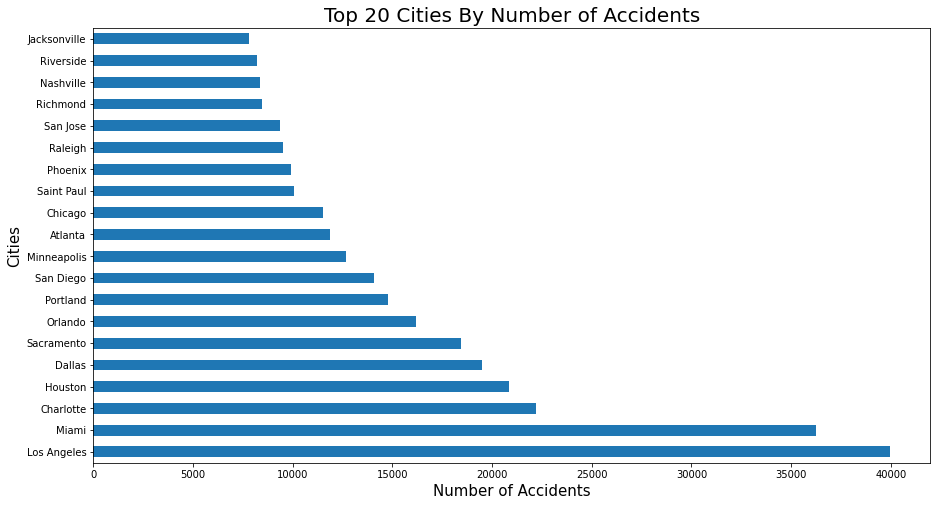

In [18]:

top_cities = accident_by_cities[:20].plot(kind='barh',figsize=(15,8))
plt.title('Top 20 Cities By Number of Accidents', fontsize=20)
plt.ylabel('Cities', fontsize=15)
plt.xlabel('Number of Accidents', fontsize=15)

Can be seen from the bar plot that the **Los Angeles** and **Miami** are the cities with most number of accidents.

In [19]:
'New York' in df['City']
'NY' in df['State']

False

#### The data on New York has not been recorded in the dataset.

Text(0, 0.5, 'Number of Cities')

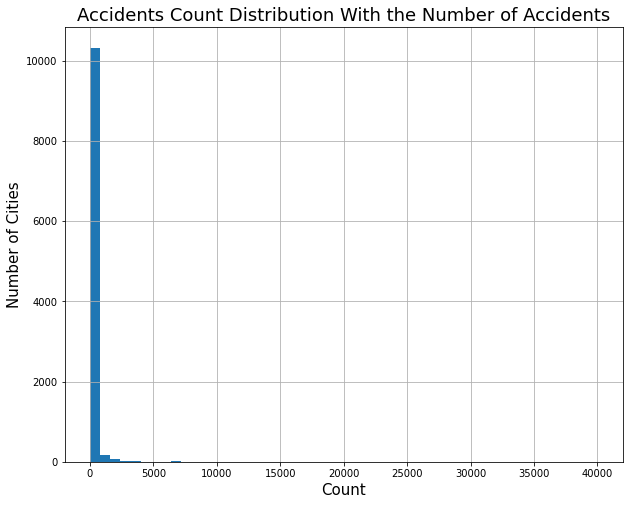

In [20]:
accident_by_cities.hist(bins=50, figsize=(10,8))

plt.title('Accidents Count Distribution With the Number of Accidents', fontsize=18)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Number of Cities', fontsize=15)

Can be seen that the majority of the cities have accidents lower than 1000. Quite a few cities out of 10658 unique cities have accidents higher than 1000

In [21]:
high_accident_cities = accident_by_cities[accident_by_cities >= 1000]
low_accident_cities = accident_by_cities[accident_by_cities < 1000]

In [22]:
percent_high = (len(high_accident_cities)/len(cities))*100
percent_high

2.3550384687558643

Only 2.35% of the cities have number of accidents greater than 1000

Text(0, 0.5, 'Number of Cities')

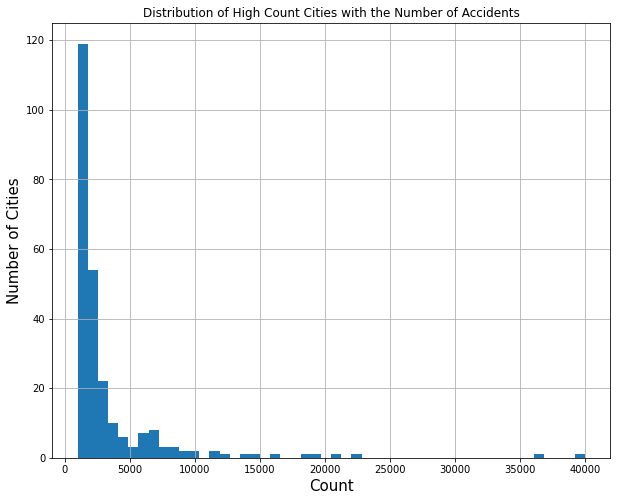

In [23]:
high_accident_cities.hist(bins=50, figsize=(10,8))
plt.title('Distribution of High Count Cities with the Number of Accidents')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Number of Cities', fontsize=15)

Among the high accidents cities, mojority of the cities have accidents less than 5000. A few have number of accidents higher than 5000.

In [24]:
percent_low = (len(low_accident_cities)/len(cities))*100
percent_low

97.63557890786264

97% of the cities have number of accidents lower than 1000

### **Date And Time**
> Start_Time and End_Time signifies the start and time and date of the accidents

In [25]:
df['Start_Time'].dtype

dtype('O')

In [26]:
df['End_Time'].dtype

dtype('O')

The datatype of both the columns is not datetime so change it to datetime format

In [27]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)
df['Start_Time']

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

#### **Hourly Analysis**

In [28]:
hour = df['Start_Time'].dt.hour

Text(0, 0.5, 'Count')

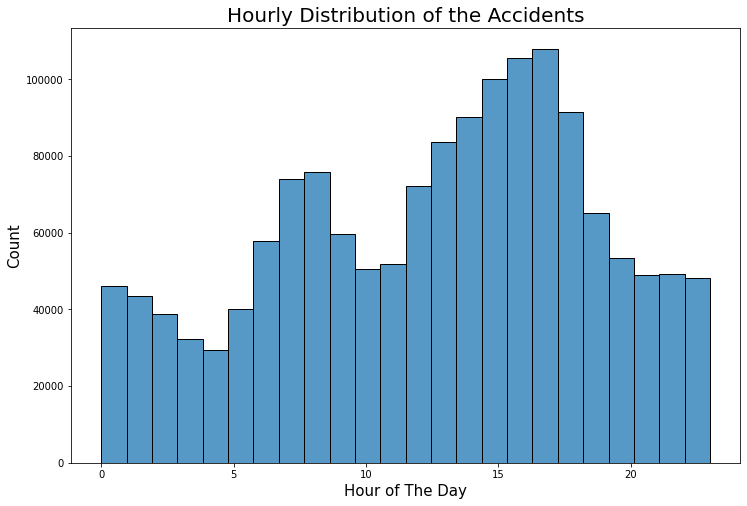

In [29]:
plt.subplots(figsize=(12,8))
sns.histplot(hour, bins=24)
plt.title('Hourly Distribution of the Accidents', fontsize=20)
plt.xlabel('Hour of The Day', fontsize=15)
plt.ylabel('Count', fontsize=15)


The above histogram signifies the number of accidents in the record that has been reported at a particular hour. It can be seen that the most number of accidents have been reported between 6AM to 9AM and 3PM to 6PM. A probable cause can be that the most people go and come from the office around these time.

In [30]:
day_of_week = df['Start_Time'].dt.dayofweek
day_of_week
# 0 for Monday to 6 for Sunday

0          0
1          0
2          0
3          0
4          0
          ..
1516059    4
1516060    4
1516061    4
1516062    4
1516063    4
Name: Start_Time, Length: 1516064, dtype: int64

Text(0, 0.5, 'Count')

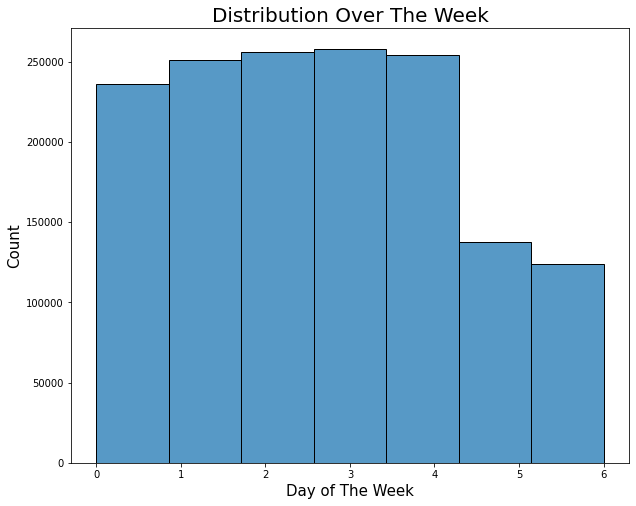

In [31]:
# Analysis over the week

from IPython.core.pylabtools import figsize
plt.subplots(figsize=(10,8))
sns.histplot(day_of_week, bins=7)
plt.title('Distribution Over The Week', fontsize=20)
plt.xlabel('Day of The Week', fontsize=15)
plt.ylabel('Count', fontsize=15)


Accidents are high on weekdays and low on weekends. The data is evenly distributed on the weekdays. So our earlier assumption about the accidents being high on office hours holds true.

In [32]:
saturday = df[df['Start_Time'].dt.dayofweek == 5]
sunday = df[df['Start_Time'].dt.dayofweek == 5]

Text(0, 0.5, 'Count')

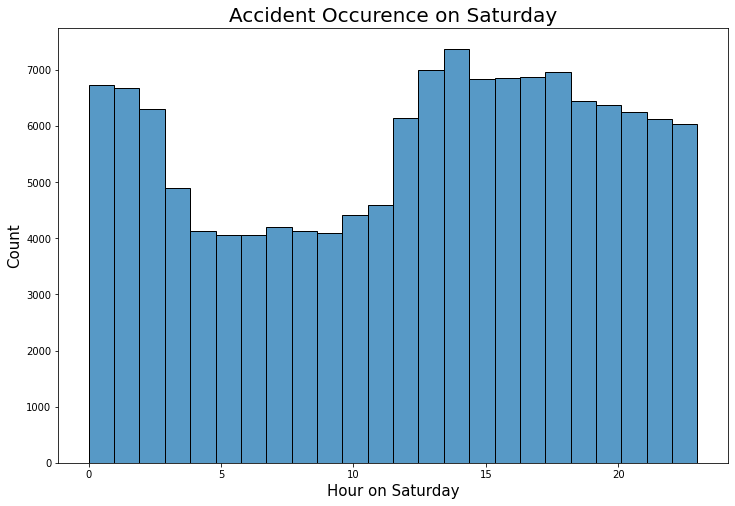

In [33]:
# Hourly distribution on Saturday

plt.subplots(figsize=(12,8))
sns.histplot(saturday['Start_Time'].dt.hour, bins=24)
plt.title('Accident Occurence on Saturday', fontsize=20)
plt.xlabel('Hour on Saturday', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

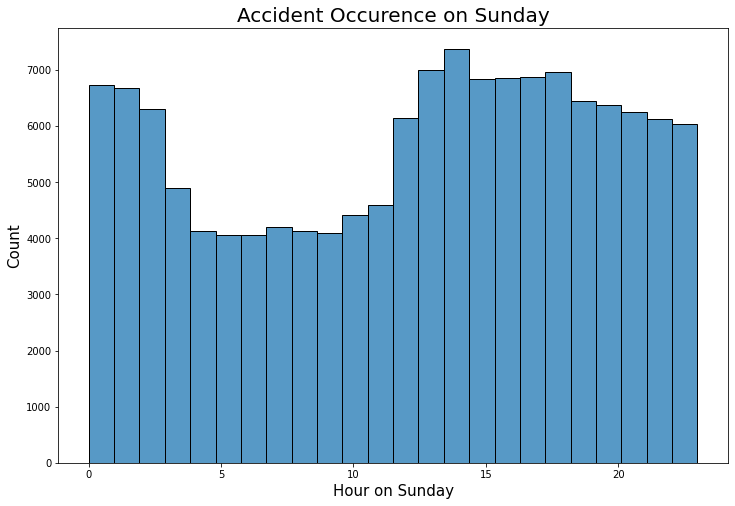

In [34]:
# Hourly distribution on Sunday

plt.subplots(figsize=(12,8))
sns.histplot(sunday['Start_Time'].dt.hour, bins=24)
plt.title('Accident Occurence on Sunday', fontsize=20)
plt.xlabel('Hour on Sunday', fontsize=15)
plt.ylabel('Count', fontsize=15)

Above two Charts show that the the distribution on Saturday and Sunday is different. The occurence is more between 1PM to 1AM both for saturday and sunday.

In [35]:
# Analysis on a random weekday

import random
random_number = random.choice([0, 1, 2, 3, 4])
rand_weekday = df[df['Start_Time'].dt.dayofweek == random_number]
random_number

1

Text(0, 0.5, 'Count')

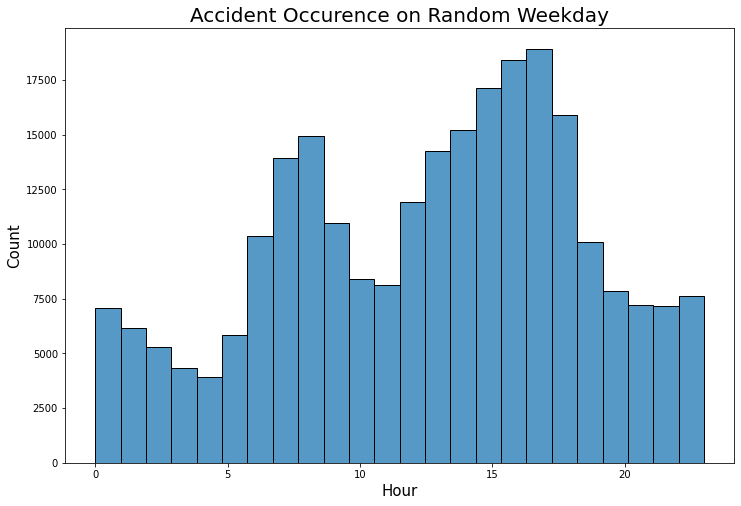

In [36]:
plt.subplots(figsize=(12,8))
sns.histplot(rand_weekday['Start_Time'].dt.hour, bins=24)
plt.title('Accident Occurence on Random Weekday', fontsize=20)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [37]:
# Analysis on a tuesday

tuesday = df[df['Start_Time'].dt.dayofweek == 1]

Text(0, 0.5, 'Count')

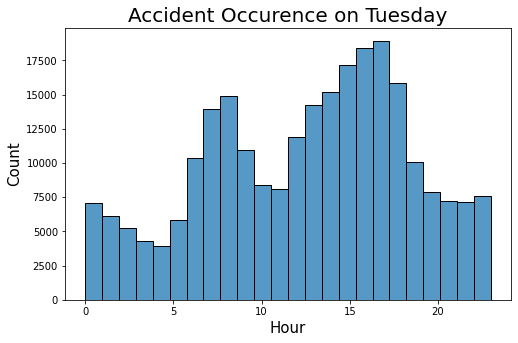

In [38]:
plt.subplots(figsize=(8,5))
sns.histplot(tuesday['Start_Time'].dt.hour, bins=24)
plt.title('Accident Occurence on Tuesday', fontsize=20)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Count', fontsize=15)

Occurence trend remains the same on weekdays and changes on the weekends 

#### **Monthly Analysis**

Text(0, 0.5, 'Count')

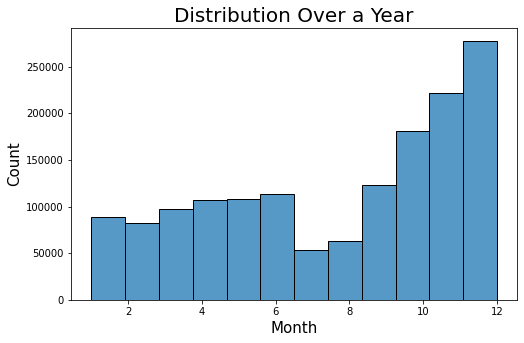

In [39]:
plt.subplots(figsize=(8,5))
sns.histplot(df['Start_Time'].dt.month, bins=12)
plt.title('Distribution Over a Year', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)

The number of accidents are increases during winter months and is highest in december and drops during summer months.

In [40]:
# Analyze the trend for the months in each year

year_2016 = df[df['Start_Time'].dt.year == 2016]
year_2017 = df[df['Start_Time'].dt.year == 2017]
year_2018 = df[df['Start_Time'].dt.year == 2018]
year_2019 = df[df['Start_Time'].dt.year == 2019]
year_2020 = df[df['Start_Time'].dt.year == 2020]

Text(0, 0.5, 'Count')

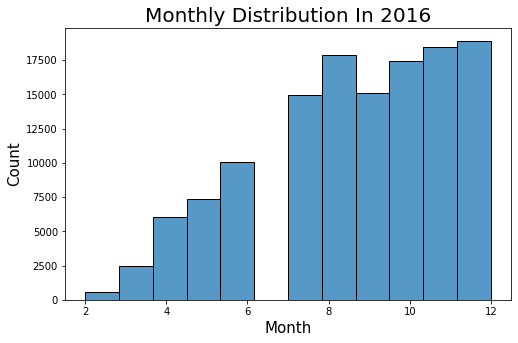

In [41]:
# 2016

plt.subplots(figsize=(8,5))
sns.histplot(year_2016['Start_Time'].dt.month, bins=12)
plt.title('Monthly Distribution In 2016', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

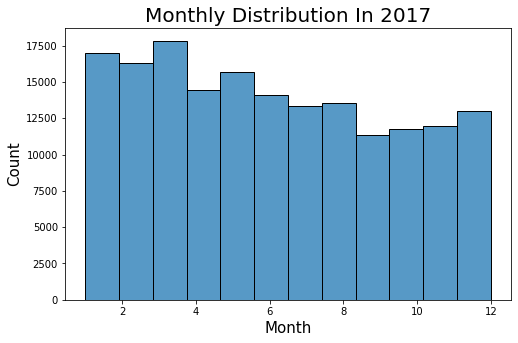

In [42]:
# 2017

plt.subplots(figsize=(8,5))
sns.histplot(year_2017['Start_Time'].dt.month, bins=12)
plt.title('Monthly Distribution In 2017', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

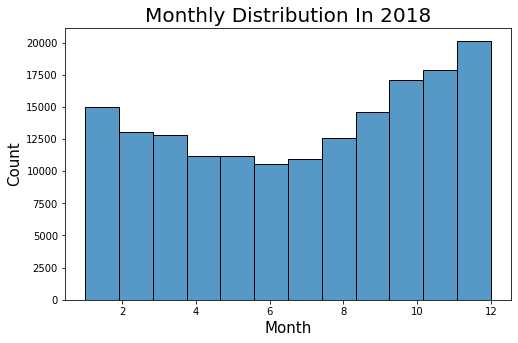

In [43]:
# 2018

plt.subplots(figsize=(8,5))
sns.histplot(year_2018['Start_Time'].dt.month, bins=12)
plt.title('Monthly Distribution In 2018', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

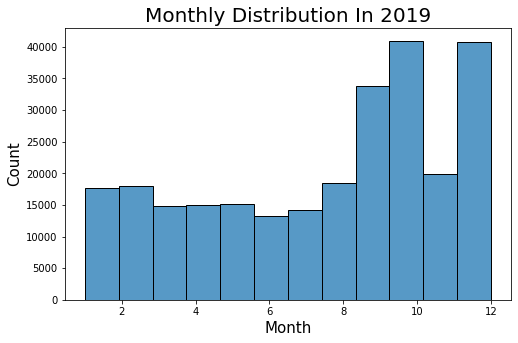

In [44]:
# 2019

plt.subplots(figsize=(8,5))
sns.histplot(year_2019['Start_Time'].dt.month, bins=12)
plt.title('Monthly Distribution In 2019', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

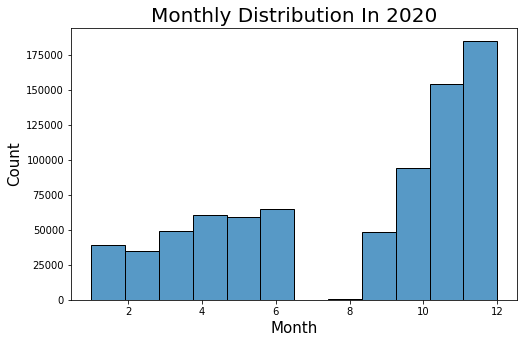

In [45]:
# 2020

plt.subplots(figsize=(8,5))
sns.histplot(year_2020['Start_Time'].dt.month, bins=12)
plt.title('Monthly Distribution In 2020', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)

The data for 2016 and 2020 seems to be incomplete and therefore shows some gaps when plotted. The data for 2017 and 2018 seems to be more balanced and both the year data shows the similar trends. 2019 shows a different trend but the accidents are more during winter except for the month of november.

### **Severity**

In [46]:
accident_severity = df.groupby('Severity').count()['ID']
accident_severity

Severity
1      28178
2    1212382
3     161052
4     114452
Name: ID, dtype: int64

Text(0.5, 1.0, 'Severity of the Accidents')

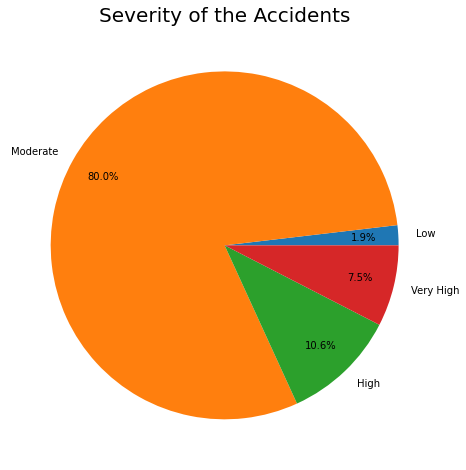

In [47]:
label = ['Low', 'Moderate', 'High', 'Very High']
plt.subplots(figsize=(8,8))
plt.pie(accident_severity, labels=label, autopct='%1.1f%%', pctdistance=0.8)
plt.title('Severity of the Accidents', fontsize=20)

80% of the accidents are moderately severe accedents and 7.5% of the accidents are highy severe.

In [48]:
df['Side']

0          R
1          R
2          R
3          R
4          R
          ..
1516059    R
1516060    R
1516061    R
1516062    R
1516063    R
Name: Side, Length: 1516064, dtype: object

In [49]:
road_side = df.groupby(['Side']).count()['ID']
road_side

Side
L     221502
R    1294562
Name: ID, dtype: int64

Text(0.5, 1.0, 'Accident Occurence by Side of Road')

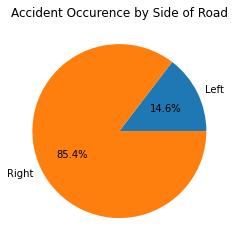

In [50]:
label = ['Left', 'Right']
plt.pie(road_side, labels=label, autopct='%1.1f%%')
plt.title('Accident Occurence by Side of Road')

More accidents are happening on the **Right** side of the road.

### **Weather Conditions**

In [56]:
weather_condition = df.groupby(['Weather_Condition']).count()['ID']
weather_condition

Weather_Condition
Blowing Dust                78
Blowing Dust / Windy        79
Blowing Snow               144
Blowing Snow / Windy        63
Clear                   180223
                         ...  
Tornado                      2
Volcanic Ash                 4
Widespread Dust             43
Wintry Mix                1251
Wintry Mix / Windy          30
Name: ID, Length: 116, dtype: int64

In [59]:
weather_condition.sort_values(ascending=False)

Weather_Condition
Fair                         465252
Mostly Cloudy                193595
Clear                        180223
Cloudy                       161291
Partly Cloudy                133102
                              ...  
Low Drifting Snow                 1
Heavy Blowing Snow                1
Sand / Dust Whirls Nearby         1
Mist / Windy                      1
Heavy Freezing Drizzle            1
Name: ID, Length: 116, dtype: int64

In [64]:
twenty_weather_conditions = weather_condition.sort_values(ascending=False)[:20]

Text(0.5, 1.0, 'Weather Condition at the Time of Accident')

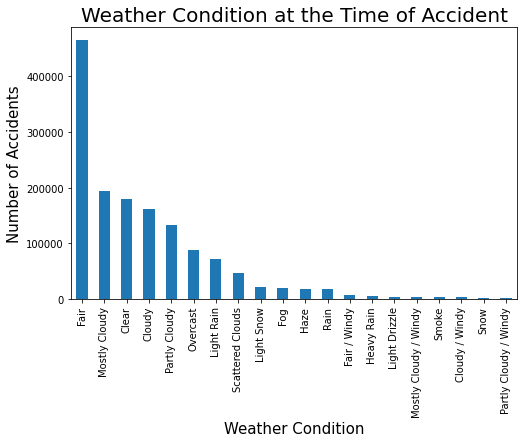

In [70]:
twenty_weather_conditions.plot(kind='bar', figsize=(8,5))
plt.ylabel('Number of Accidents', fontsize=15)
plt.xlabel('Weather Condition', fontsize=15)
plt.title('Weather Condition at the Time of Accident', fontsize=20)

From the above plot, it can be seen that the number of accidents are high in number when the weather is fair.

### **Findings**

> Top two cities by number of accidents are Los Angeles and Miami. The data for New York is not included in the data.

> Accidents are more likely to occur during peak hours i.e., when the most of the people go and come from the offices during week days. During weekends accidents tends to shift toward the evening side.

> Weekdays record more accidents than the weekends.

> Accidents happened more frequently on the Right side of the road than on the Left side.

> Accidents occurence is more in the winter months of the year. Some of the data is missing for the year so a proper inference is hard to get.

> Most of the accidents happened when the weather was fair. Perhaps the bad weather is not a big contributing factor to accidents.
